<a href="https://colab.research.google.com/github/jyotidabass/Tongue-image-crop-using-canny-edge-detector/blob/main/Tongue_image_crop_using_canny_edge_detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Original image dimensions: 1037x905
Execution time: 0.02555227279663086 sec


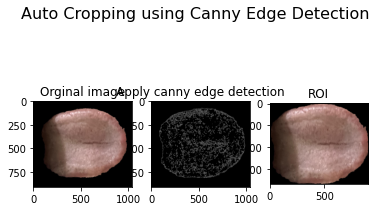

ROI attributes:-
- Image dimensions: 899x737
- Height (rows): 737 pixels
- Width (columns): 899 pixels
- No. of pixels: 662563
- Color channels: 3
- Bit depth: 24
- Storage size (without compression)): 1987689 bytes
- Intensity Values
	Min Intensity (Blue): 0
	Max Intensity (Blue): 247
	Average Intensity (Blue): 79
	Min Intensity (Green): 0
	Max Intensity (Green) 246
	Average Intensity (Green): 86
	Min Intensity (Red): 0
	Max Intensity (Red) 255
	Average Intensity (Red): 113


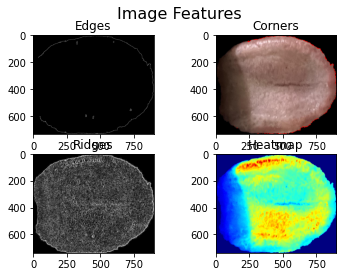

In [3]:
from time import time

import cv2
import matplotlib.pyplot as plt
import numpy as np

def auto_crop(file_name):
    """
    Input argument: file_name (Image file name, e.g., 'rose.tif')
    
    This function will auto crop the given image using image processing technique
    
    Output: ROI
    """
    # Start timer
    start_time = time()
    # Read an image
    img = cv2.imread(file_name, cv2.IMREAD_UNCHANGED)
    height = img.shape[0]
    width = img.shape[1]
    # Check image is grayscale or not 
    if len(img.shape) == 2:
        gray_img = img.copy()
    else:
        # Convert bgr image to grayscale image
        gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # To find upper threshold, we need to apply Otsu's thresholding
    upper_thresh, thresh_img = cv2.threshold(gray_img, thresh=0, maxval=255, type=cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    # Calculate lower threshold
    lower_thresh = 0.5*upper_thresh
    # Apply canny edge detection
    canny = cv2.Canny(img, lower_thresh, upper_thresh)
    # Finding the non-zero points of canny
    pts = np.argwhere(canny>0)
    # Finding the min and max points
    y1,x1 = pts.min(axis=0)
    y2,x2 = pts.max(axis=0)
    # Crop ROI from the givn image
    roi_img = img[y1:y2, x1:x2]
    # Printing image dimensions, execution time
    print(f'Original image dimensions: {width}x{height}')
    print(f'Execution time: {time()-start_time} sec')
    # Display images
    fig = plt.figure()
    fig.suptitle('Auto Cropping using Canny Edge Detection', fontsize=16)
    fig.add_subplot(1,3, 1).set_title('Orginal image')
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    fig.add_subplot(1,3, 2).set_title('Apply canny edge detection')
    plt.imshow(cv2.cvtColor(canny, cv2.COLOR_BGR2RGB))
    fig.add_subplot(1,3, 3).set_title('ROI')
    plt.imshow(cv2.cvtColor(roi_img, cv2.COLOR_BGR2RGB))
    plt.show()

    return roi_img


def image_attributes(img):
    """
    Input argument: img (Opencv mat)
    
    This function will display the following image attributes:
    - Height and Width
    - Color Channel
    - DPI
    - Max/Min/Average Intensity Values
    Output: image attributes
    """
    height = img.shape[0]
    width = img.shape[1]
    if len(img.shape) == 2:
        no_of_channels = 1
    else:
        no_of_channels = img.shape[2]
    bit_depth = no_of_channels*8
    storage_size = int((height*width*bit_depth)/8)
    # Calculate intensity value
    min_intensity = img.min(axis=0).min(axis=0)
    max_intensity = img.max(axis=0).max(axis=0)
    average_intensity = img.mean(axis=0).mean(axis=0).astype(int)

    print(f'- Image dimensions: {width}x{height}')
    print(f'- Height (rows): {height} pixels')
    print(f'- Width (columns): {width} pixels')
    print(f'- No. of pixels: {height*width}')
    print(f'- Color channels: {no_of_channels}')
    print(f'- Bit depth: {bit_depth}')
    print(f'- Storage size (without compression)): {storage_size} bytes')
    print('- Intensity Values')
    if no_of_channels == 1:
        print(f'\tMin Intensity: {min_intensity}')
        print(f'\tMax Intensity: {max_intensity}')
        print(f'\tAverage Intensity: {average_intensity}')
    elif no_of_channels == 3:
        print(f'\tMin Intensity (Blue): {min_intensity[0]}')
        print(f'\tMax Intensity (Blue): {max_intensity[0]}')
        print(f'\tAverage Intensity (Blue): {average_intensity[0]}')
        print(f'\tMin Intensity (Green): {min_intensity[1]}')
        print(f'\tMax Intensity (Green) {max_intensity[1]}')
        print(f'\tAverage Intensity (Green): {average_intensity[1]}')
        print(f'\tMin Intensity (Red): {min_intensity[2]}')
        print(f'\tMax Intensity (Red) {max_intensity[2]}')
        print(f'\tAverage Intensity (Red): {average_intensity[2]}')


def image_features(img):
    """
    Input argument: img (Opencv mat)
    
    This function will display the following image features:
    - Edges 
    - Corners / interest points
    - Blobs / regions of interest points
    - Ridges
    Output: display image features
    """
    # Apply canny edge detection
    canny_img = cv2.Canny(img, 50, 200)
    # Check image is grayscale or not 
    if len(img.shape) == 2:
        gray_img = img.copy()
        img = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
    else:
        # Convert bgr image to grayscale image
        gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Get heatmap image
    heatmap_img = cv2.applyColorMap(gray_img, cv2.COLORMAP_JET)

    # Corners detection
    corner_img = img.copy()
    gray_img_float = np.float32(gray_img)
    dst = cv2.cornerHarris(gray_img_float,2,3,0.04)
    dst = cv2.dilate(dst, None)
    # Threshold for an optimal value
    corner_img[dst>0.01*dst.max()]=[0,0,255]

    ridge_filter = cv2.ximgproc.RidgeDetectionFilter_create()
    ridges_img = ridge_filter.getRidgeFilteredImage(img)

    # Display image features
    fig = plt.figure()
    fig.suptitle('Image Features', fontsize=16)
    
    fig.add_subplot(2,2, 1).set_title('Edges')
    plt.imshow(cv2.cvtColor(canny_img, cv2.COLOR_BGR2RGB))
    
    fig.add_subplot(2,2, 2).set_title('Corners')
    plt.imshow(cv2.cvtColor(corner_img, cv2.COLOR_BGR2RGB))

    fig.add_subplot(2,2, 3).set_title('Ridges')
    plt.imshow(cv2.cvtColor(ridges_img, cv2.COLOR_BGR2RGB))
    
    fig.add_subplot(2,2, 4).set_title('Heatmap')
    plt.imshow(cv2.cvtColor(heatmap_img, cv2.COLOR_BGR2RGB))
    plt.show()


if __name__ == '__main__':
    file_name = '/content/cropped-1E6AE7E2-F4F6-4EFC-AFEC-75B6AF988C47 - Abhishek Karekar.jpg'
    roi_img = auto_crop(file_name)
    print('ROI attributes:-')
    image_attributes(roi_img)
    image_features(roi_img)